<hr><h1 align='center'>IBM Data Science Professional Certificate</h1><h2 align='center'>Capstone Project: The Battle of Neighborhoods</h2><br><hr>

<h3 align='center'>Author: Sebastiano Fazzino</h3><br><hr><br>

<h2 align='center'>Introduction</h2>

My name is Sebastiano, I'm Italian and I'm 28. I like calling myself a 'World Citizen', as I've been living in four different countries so far, and I'm about to move to a fifth one. 
I've mostly been working in the customer service industry but I've always been interested in IT, I'm actually an entry level self-taught progrmmer and my goal for late 2020/beginning of 2021 is to start working in the IT industry at a professional level.

Althought data scientists' work is usually focused on finding solutions to someone else's problems, in this project I'll mostly focus on myself and I'll try to give a proper answer to my question. As I mentioned before, I'm about to move in another country, and this will be Estonia, to be more specific I'll move to Tallinn which is the capital of Estonia.<br>
I'm not really familiar with Estonia, I just know that it's a technology-oriented country, it's very green and it's one of Europe's least crowded countries.<br><br>
So in this project I'll try to give an answer to a question I've been recently wondering:

<h3 align='center'>Where in Tallinn should I live?</h3>



<br>To answer this question I'll be analyzing different neighboorhoods in Tallinn and I'll pick one of them according to different parameters:
<ul><li>distance from the city center;</li>
    <li>public transportantions;</li>
    <li>shops and facilities in the neighborhood(shopping malls, gym, cafes, restaurants);</li>
    <li>number of people living in the neighborhood (I'd like it to be a tranquil neighborhood with no much traffic!)</li>
</ul>

<br><h2 align='center'>Hands on the project:</h2>

In order to find an answer to my question I'll be using:

<br><h3>The Internet</h3>
From these webpages https://en.wikipedia.org/wiki/Tallinn & https://www.stat.ee/stat-unemployment-rate, using <strong>'Pandas'</strong> Python library I'll extract information about Estonia and Tallinn's neighborhoods I need for my project, such as population density or unemployment rate.
<br><h3>Foursquare dataset</h3>
To retrieve information about venues and point of interest in the different neighborhoods;
<br><h3>Google Maps</h3>
To help me finding the coordinates of every single neighborhood, luckily Tallinn only has 8 neighborhoods, so I've decided to include two suburbs which are relatively close to the city center.
<br><h3>Clustering</h3>
To facilitate my work I might cluster neighborhoods according to their similarity.
<br><h3>Data Visualization</h3>
I'll be supporting my thesis using maps and plots.

<br><br><hr><h1 align='center'>Notebook</h1><br><hr>

<h3>We start importing all the libraries required:<br>

In [321]:
!pip install geopy
!pip install lxml==4.5.2

In [322]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
from geopy.geocoders import Nominatim
from sklearn.cluster import KMeans
import folium
import requests 
from pandas.io.json import json_normalize 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
sns.set()
%matplotlib inline

<br><br><h3 align='center'>Estonia's unemployment analysis and tendency</h3>

Let's start saying that once I'll be in Estonia, my priority will be to find a job asap, so I've been doing some searches about Estonia's unemployment rate.

We can found the data needed in this website:https://www.stat.ee/stat-unemployment-rate and we can extract it using <strong>Pandas pd.read_html</strong> function:

In [323]:
#We store the page into 'table' variable
table = pd.read_html("https://www.stat.ee/stat-unemployment-rate")
#We only need the first table of the page (table[0]), so we store it into 'unemployment'
unemployment_data = table[0]


In [324]:
unemployment_data

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,4.6,5.5,13.5,16.7,12.3,10.0,8.6,7.4,6.2,6.8,5.8,5.4,4.4


<br>From 'unemployment_data' dataset we can notice that from 2010 the unemployment rate has decreased significantly. Doing some searches I found out that on July the 13h 2010 Estonia officially became an European Union member and from December the 31st of the same year Euro became the new national currency, so I believe that this event and the unemployment rate are thightly related.
Let's plot the data to have a better understanding of it:

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0, 0.5, 'Percentage')

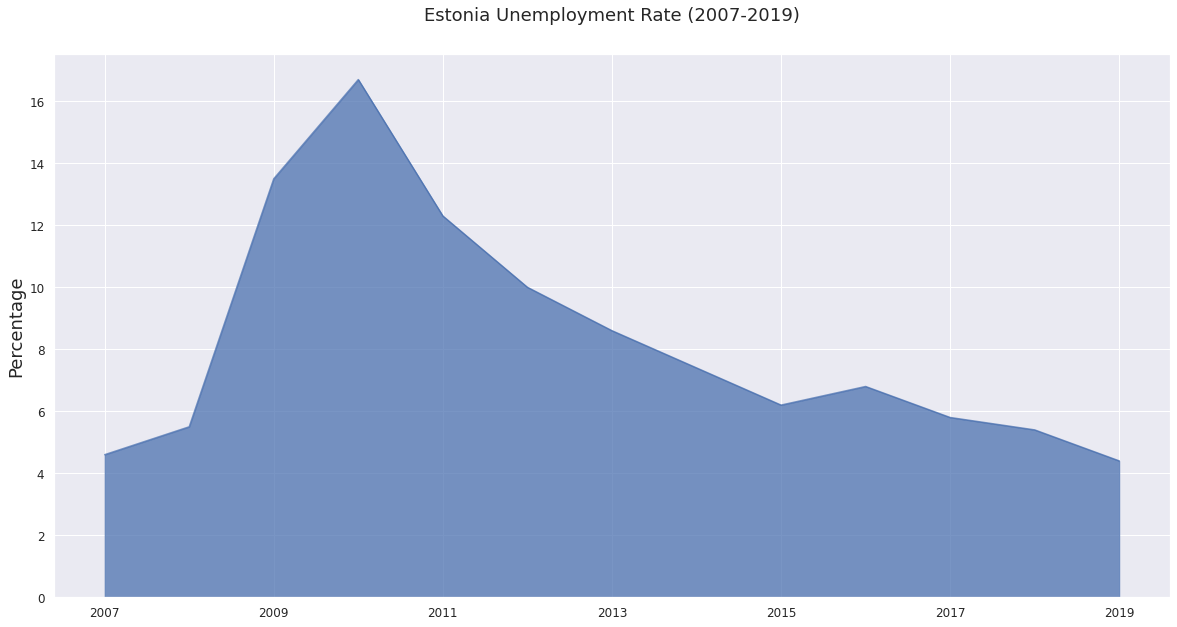

In [325]:
unemployment_data.loc[0].plot(kind='area',
                      figsize=(20,10),
                      alpha=0.75,
                      fontsize=12
                      )
plt.title("Estonia Unemployment Rate (2007-2019)",fontsize=18, y=1.05) 
plt.ylabel('Percentage',fontsize=18)

<br>Let's also use a <strong>Regression Plot</strong> to visualize the tendency of the unemployment rate from 2010 to 2019;<br>
but first I'll be exporting the dataset as csv file to modify it in order to make it easier to plot:

In [326]:
unemployment_rate = pd.read_csv('unemployment_rate.csv')
unemployment_rate

,Year,unemployment_rate
0,2007,4.6
1,2008,5.5
2,2009,13.5
3,2010,16.7
4,2011,12.3
5,2012,10.0
6,2013,8.6
7,2014,7.4
8,2015,6.2
9,2016,6.8


<br>Now our 'unemployment_data' dataset has two columns (Year and unemployment_rate) and it's easier to interpret.<br>
Let's plot it using <strong>Seaborn regplot</strong>:

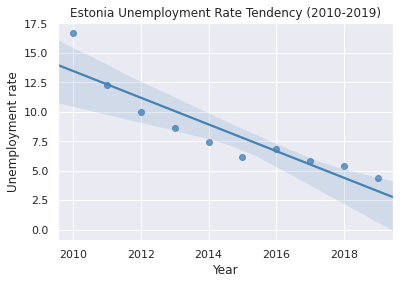

In [327]:
ax = sns.regplot(x='Year',y='unemployment_rate',
                 data=unemployment_rate[3:13],
                 color='steelblue',
                 )

ax.set(xlabel='Year',ylabel='Unemployment rate')
ax.set_title('Estonia Unemployment Rate Tendency (2010-2019)')
sns.set_style('ticks')
sns.set(font_scale=1)

As we can see the unemployment rate decreases going ahead with the years from 2010.

Analyzing this data I can determine that the unemployment rate in Estonia was around 4.5 on 2019 and if it continues following this tendency, should be ever lower on 2020, hence it shouldn't be very hard to find a job in Estonia.


<h3 align='center'>Tallinn's neighborhoods analysis</h3>

<br>I have created a .csv file containting Tallinn's neighborhoods coordinates. We can easily read the file into a pd dataframe using <strong>'pd.read_csv'</strong> function:<br>

In [328]:
Tallinn_Neighborhoods_Coordinates = pd.read_csv('Tallinn_Neighborhoods_Coordinates.csv')
Tallinn_Neighborhoods_Coordinates

,Neighborhood,Latitude,Longitude
0,Pirita,59.4749,24.8725
1,Pohja,59.4550,24.6894
2,Nomme,59.3807,24.6995
3,Mustamae,59.4010,24.6945
4,Kristiine,59.4164,24.7100
5,Haabersti,59.4267,24.6313
6,Lasnamae,59.4293,24.8352
7,Kesklinn,59.4328,24.7629
8,Viimsi,59.4994,24.8419
9,Peetri,59.3948,24.8118


<br><br>Let's find Tallinn coordinates using <strong>Geocoder</strong>:<br>

In [329]:
address = 'Tallinn'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

59.4372155 24.7453688


<br><br>In the next step we'll create a map of Tallinn and its neighborhoods using <strong>Folium</strong> library 

In [330]:
Tallinn_Map = folium.Map(location=[latitude,longitude], zoom_start=11)

for lat, lng, neighborhood in zip(Tallinn_Neighborhoods_Coordinates['Latitude'],
                                  Tallinn_Neighborhoods_Coordinates['Longitude'],
                                  Tallinn_Neighborhoods_Coordinates['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='white',
        fill_opacity=0.7,
        parse_html=False).add_to(Tallinn_Map)  
    
Tallinn_Map

<br><br>Using <strong>'Foursquare'</strong>, we can find venues and point of interests of each neighborhood using its coordinates.

We start defining Foursquare Credentials and Vesion:<br>

In [331]:
CLIENT_ID = 'YDEFE3BRIVVDPTQPTR042NEQONEDSTGFRVSAH0QNOAOAUQF4'
CLIENT_SECRET = '0K5OYCFOP0OMPFTJCSPEPOXQ2NSUSMAP0SRMOZWBYZQRBTEN'
VERSION = '20201008'
LIMIT = 1000

<br>Then we define a function to find venues around Tallinn's neighborhood with a radius of 1 km

In [332]:
def getTallinnVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for  lat, lng, name in zip(Tallinn_Neighborhoods_Coordinates['Latitude'],
                               Tallinn_Neighborhoods_Coordinates['Longitude'],
                               Tallinn_Neighborhoods_Coordinates['Neighborhood']):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [333]:
tallinn_venues = getTallinnVenues(names=Tallinn_Neighborhoods_Coordinates['Neighborhood'],
                                   latitudes=Tallinn_Neighborhoods_Coordinates['Latitude'],
                                   longitudes=Tallinn_Neighborhoods_Coordinates['Longitude']
                                  )
tallinn_venues.head(11)

Pirita
Pohja
Nomme
Mustamae
Kristiine
Haabersti
Lasnamae
Kesklinn
Viimsi
Peetri


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Pirita,59.4749,24.8725,Tallinna Botaanikaaia palmimaja,59.469881,24.878135,Garden
1,Pirita,59.4749,24.8725,Tallinna Botaanikaaed,59.469908,24.878089,Botanical Garden
2,Pirita,59.4749,24.8725,Tallinna Teletorn,59.471209,24.887450,Scenic Lookout
3,Pirita,59.4749,24.8725,Tallinna Teletorn Restaurant,59.471185,24.887434,Restaurant
4,Pirita,59.4749,24.8725,Tallinna Teletorn Edgewalk,59.471251,24.887421,Scenic Lookout
5,Pirita,59.4749,24.8725,Teletorni brasserie/restoran,59.471243,24.887455,Restaurant
6,Pirita,59.4749,24.8725,Teletorni bussipeatus,59.472725,24.884168,Bus Stop
7,Pirita,59.4749,24.8725,Teletorni ring,59.473591,24.884988,Trail
8,Pirita,59.4749,24.8725,Pirita jõe vaateplats,59.466971,24.871376,River
9,Pirita,59.4749,24.8725,Teletorni Restorani Suitsuruum,59.471245,24.887568,Smoke Shop


<br>Let's check how many venues did our function return per neighborhood:

In [334]:
tallinn_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Haabersti,23,23,23,23,23,23
Kesklinn,100,100,100,100,100,100
Kristiine,25,25,25,25,25,25
Lasnamae,26,26,26,26,26,26
Mustamae,42,42,42,42,42,42
Nomme,33,33,33,33,33,33
Peetri,22,22,22,22,22,22
Pirita,10,10,10,10,10,10
Pohja,16,16,16,16,16,16


As expected, 'Kesklinn' neighborhood, being in the city center, has the highest number of venues and point of interest in the city<br><br>

Let's further continue with our analysis:<br>
First of all we want to know many unique categories are there in our dataset:

In [335]:
print('There are {} uniques categories.'.format(len(tallinn_venues['Venue Category'].unique())))

There are 118 uniques categories.


<br><br>We now proceed using <strong>'get_dummies'</strong> method to convert categorical variables into dummy variables and we store the information in a new dataframe 

In [336]:
tallinn_onehot = pd.get_dummies(tallinn_venues[['Venue Category']], prefix="", prefix_sep="")

tallinn_onehot['Neighborhood'] = tallinn_venues['Neighborhood'] 

fixed_columns = [tallinn_onehot.columns[-1]] + list(tallinn_onehot.columns[:-1])
tallinn_onehot = tallinn_onehot[fixed_columns]

tallinn_onehot.head()

,Neighborhood,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Basketball Court,Bistro,Board Shop,Boarding House,Boat or Ferry,Bookstore,Botanical Garden,Bowling Alley,Buffet,Burger Joint,Bus Line,Bus Station,Bus Stop,Cafeteria,Café,Candy Store,Casino,Caucasian Restaurant,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Diner,Eastern European Restaurant,Electronics Store,Escape Room,Event Space,Farmers Market,Fast Food Restaurant,Flower Shop,Food,Food & Drink Shop,Forest,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,Hockey Arena,Hostel,Hotel,Hotel Bar,Hotel Pool,Hunting Supply,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Liquor Store,Lounge,Massage Studio,Middle Eastern Restaurant,Modern European Restaurant,Movie Theater,Moving Target,Multiplex,Museum,Opera House,Other Repair Shop,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Pub,Restaurant,River,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Shoe Store,Shopping Mall,Ski Area,Smoke Shop,Soccer Field,Spa,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Tennis Court,Thai Restaurant,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Wine Bar,Wine Shop,Wings Joint
0,Pirita,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Pirita,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Pirita,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Pirita,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Pirita,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<br><br>After that, we group by neighborhood and by taking the mean of the frequency of occurrence of each category

In [337]:
tallinn_grouped = tallinn_onehot.groupby('Neighborhood').mean().reset_index()
tallinn_grouped

,Neighborhood,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Basketball Court,Bistro,Board Shop,Boarding House,Boat or Ferry,Bookstore,Botanical Garden,Bowling Alley,Buffet,Burger Joint,Bus Line,Bus Station,Bus Stop,Cafeteria,Café,Candy Store,Casino,Caucasian Restaurant,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Diner,Eastern European Restaurant,Electronics Store,Escape Room,Event Space,Farmers Market,Fast Food Restaurant,Flower Shop,Food,Food & Drink Shop,Forest,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,Hockey Arena,Hostel,Hotel,Hotel Bar,Hotel Pool,Hunting Supply,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Liquor Store,Lounge,Massage Studio,Middle Eastern Restaurant,Modern European Restaurant,Movie Theater,Moving Target,Multiplex,Museum,Opera House,Other Repair Shop,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Pub,Restaurant,River,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Shoe Store,Shopping Mall,Ski Area,Smoke Shop,Soccer Field,Spa,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Tennis Court,Thai Restaurant,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Wine Bar,Wine Shop,Wings Joint
0,Haabersti,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00,0.00,0.00,0.0000,0.00,0.0,0.000000,0.00000,0.000000,0.086957,0.043478,0.043478,0.00,0.000000,0.00,0.00,0.000000,0.00000,0.00,0.00,0.000000,0.0000,0.043478,0.086957,0.00,0.00000,0.00,0.00,0.00,0.00,0.000000,0.043478,0.000000,0.00,0.00,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.043478,0.0,0.00,0.000000,0.000000,0.130435,0.0000,0.043478,0.00,0.00,0.00,0.043478,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000,0.00,0.00,0.00,0.000000,0.00000,0.000000,0.00,0.043478,0.00,0.000000,0.000000,0.000000,0.043478,0.043478,0.00,0.000000,0.00,0.000000,0.000000,0.0,0.00,0.000000,0.00,0.0,0.000000,0.00000,0.00000,0.0,0.000000,0.000000,0.000000,0.00,0.086957,0.00,0.043478,0.00,0.000000,0.086957,0.000000,0.000000,0.00,0.043478,0.00
1,Kesklinn,0.000000,0.01000,0.000000,0.000000,0.000000,0.010000,0.01000,0.00000,0.020000,0.00000,0.01,0.01,0.01,0.0000,0.02,0.0,0.000000,0.00000,0.020000,0.000000,0.000000,0.000000,0.01,0.060000,0.01,0.01,0.000000,0.01000,0.01,0.06,0.030000,0.0000,0.020000,0.000000,0.03,0.00000,0.00,0.01,0.02,0.02,0.000000,0.000000,0.010000,0.01,0.01,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.01000,0.010000,0.0,0.02,0.020000,0.010000,0.030000,0.0000,0.000000,0.01,0.01,0.02,0.000000,0.000000,0.060000,0.01,0.01,0.000000,0.000000,0.01,0.030000,0.010000,0.01,0.010,0.01,0.00,0.00,0.000000,0.01000,0.000000,0.01,0.000000,0.01,0.000000,0.000000,0.010000,0.000000,0.000000,0.01,0.010000,0.00,0.010000,0.060000,0.0,0.01,0.000000,0.01,0.0,0.000000,0.00000,0.00000,0.0,0.000000,0.010000,0.000000,0.01,0.010000,0.02,0.000000,0.01,0.010000,0.000000,0.000000,0.000000,0.01,0.010000,0.01
2,Kristiine,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.04000,0.12,0.00,0.00,0.0000,0.00,0.0,0.000000,0.00000,0.080000,0.040000,0.040000,0.000000,0.00,0.040000,0.00,0.00,0.000000,0.00000,0.00,0.00,0.000000,0.0000,0.000000,0.040000,0.00,0.00000,0.04,0.00,0.00,0.00,0.040000,0.040000,0.000000,0.00,0.00,0.00000,0.040000,0.040000,0.000000,0.000000,0.00000,0.00000,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.0000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.040000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000,0.00,0.04,0.08,0.000000,0.00000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.040000,0.000000,

<br>Let's find out the top 5 venues oer neighborhood depending on their frequency:

In [338]:
tallinn_top_venues = 5

for hood in tallinn_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = tallinn_grouped[tallinn_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(tallinn_top_venues))
    print('\n')

----Haabersti----
                  venue  freq
0  Gym / Fitness Center  0.13
1     Convenience Store  0.09
2                 Trail  0.09
3           Supermarket  0.09
4              Bus Line  0.09


----Kesklinn----
                venue  freq
0               Hotel  0.06
1        Cocktail Bar  0.06
2                Café  0.06
3          Restaurant  0.06
4  Italian Restaurant  0.03


----Kristiine----
                       venue  freq
0                     Bistro  0.12
1  Middle Eastern Restaurant  0.08
2               Burger Joint  0.08
3                   Bus Line  0.04
4                       Park  0.04


----Lasnamae----
                    venue  freq
0  Furniture / Home Store  0.15
1             Supermarket  0.08
2                    Café  0.08
3                    Park  0.04
4       Food & Drink Shop  0.04


----Mustamae----
           venue  freq
0  Grocery Store  0.07
1    Pizza Place  0.07
2           Café  0.05
3      BBQ Joint  0.05
4    Supermarket  0.05


----Nomme----
 

In [339]:
def return_most_common_venues(row, tallinn_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:tallinn_top_venues]

<br>Now we want to know what are the best 10 venues per neighborhood and we store the data in a new dataset:

In [340]:
tallinn_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(tallinn_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = tallinn_grouped['Neighborhood']

for ind in np.arange(tallinn_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(tallinn_grouped.iloc[ind, :], tallinn_top_venues)

neighborhoods_venues_sorted.head(11)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Haabersti,Gym / Fitness Center,Convenience Store,Trail,Supermarket,Bus Line,Furniture / Home Store,Hockey Arena,Concert Hall,Pet Store,Pharmacy
1,Kesklinn,Café,Hotel,Restaurant,Cocktail Bar,Italian Restaurant,Cosmetics Shop,Coffee Shop,Gym / Fitness Center,Department Store,Grocery Store
2,Kristiine,Bistro,Middle Eastern Restaurant,Burger Joint,Pharmacy,Bus Station,Bus Line,Playground,Pizza Place,Diner,Eastern European Restaurant
3,Lasnamae,Furniture / Home Store,Café,Supermarket,Electronics Store,Japanese Restaurant,Bowling Alley,Park,Hotel,Other Repair Shop,Soccer Field
4,Mustamae,Pizza Place,Grocery Store,BBQ Joint,Café,Convenience Store,Park,Pub,Supermarket,Electronics Store,Buffet
5,Nomme,Bus Stop,Park,Restaurant,Flower Shop,Soccer Field,Pub,Indian Restaurant,Bus Line,Pizza Place,Shoe Store
6,Peetri,Coffee Shop,Auto Garage,Eastern European Restaurant,Paper / Office Supplies Store,Spa,Caucasian Restaurant,Park,Pet Store,Pharmacy,Pizza Place
7,Pirita,Scenic Lookout,Restaurant,Bus Stop,Smoke Shop,River,Botanical Garden,Trail,Garden,Concert Hall,Convenience Store
8,Pohja,Supermarket,Park,Liquor Store,Harbor / Marina,Convenience Store,Bus Stop,Bus Station,Community Center,Boat or Ferry,Basketball Court
9,Viimsi,Café,Supermarket,Arts & Crafts Store,Bar,Park,Convenience Store,Pizza Place,Bus Station,Burger Joint,Italian Restaurant


<br><br><h1 align='center'>Neighborhoods Clustering</h1><br>

We can now proceed clustering the neighborhoods using <strong>K-means</strong> function. I've decided to set the number of cluster to 4:

In [341]:
kclusters = 4

tallinn_clustering = tallinn_grouped.drop('Neighborhood', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=1).fit(tallinn_clustering)

kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 0, 1, 3, 2, 2], dtype=int32)

<br>We assign the k-means label to each neigborhood and then we plot the map of Tallinn with its neighborhoods clustered depending on their similarity:

In [342]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

tallinn_merged = Tallinn_Neighborhoods_Coordinates

tallinn_merged = tallinn_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')



In [343]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(tallinn_merged['Latitude'], tallinn_merged['Longitude'], tallinn_merged['Neighborhood'], tallinn_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=1).add_to(map_clusters)
       
map_clusters

<br><h3>Let's analyze the clusters we've created:</h3>

In [344]:
tallinn_merged.loc[tallinn_merged['Cluster Labels'] == 0, tallinn_merged.columns[[0] + list(range(4, tallinn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Nomme,Bus Stop,Park,Restaurant,Flower Shop,Soccer Field,Pub,Indian Restaurant,Bus Line,Pizza Place,Shoe Store


In [345]:
tallinn_merged.loc[tallinn_merged['Cluster Labels'] == 1, tallinn_merged.columns[[0] + list(range(4, tallinn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Mustamae,Pizza Place,Grocery Store,BBQ Joint,Café,Convenience Store,Park,Pub,Supermarket,Electronics Store,Buffet
4,Kristiine,Bistro,Middle Eastern Restaurant,Burger Joint,Pharmacy,Bus Station,Bus Line,Playground,Pizza Place,Diner,Eastern European Restaurant
5,Haabersti,Gym / Fitness Center,Convenience Store,Trail,Supermarket,Bus Line,Furniture / Home Store,Hockey Arena,Concert Hall,Pet Store,Pharmacy
6,Lasnamae,Furniture / Home Store,Café,Supermarket,Electronics Store,Japanese Restaurant,Bowling Alley,Park,Hotel,Other Repair Shop,Soccer Field
7,Kesklinn,Café,Hotel,Restaurant,Cocktail Bar,Italian Restaurant,Cosmetics Shop,Coffee Shop,Gym / Fitness Center,Department Store,Grocery Store
9,Peetri,Coffee Shop,Auto Garage,Eastern European Restaurant,Paper / Office Supplies Store,Spa,Caucasian Restaurant,Park,Pet Store,Pharmacy,Pizza Place


In [346]:
tallinn_merged.loc[tallinn_merged['Cluster Labels'] == 2, tallinn_merged.columns[[0] + list(range(4, tallinn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Pohja,Supermarket,Park,Liquor Store,Harbor / Marina,Convenience Store,Bus Stop,Bus Station,Community Center,Boat or Ferry,Basketball Court
8,Viimsi,Café,Supermarket,Arts & Crafts Store,Bar,Park,Convenience Store,Pizza Place,Bus Station,Burger Joint,Italian Restaurant


In [347]:
tallinn_merged.loc[tallinn_merged['Cluster Labels'] == 3, tallinn_merged.columns[[0] + list(range(4, tallinn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Pirita,Scenic Lookout,Restaurant,Bus Stop,Smoke Shop,River,Botanical Garden,Trail,Garden,Concert Hall,Convenience Store


<br><br><h3 align='center'>Population density analysis</h3>

In this last section of the notebook we want to determine which is the neighborhood with less population density in Tallinn.

We start importing a dataset from Wikipedia containing all the information we need. To do so we use <strong>Pandas pd.read_html</strong> function:

In [348]:
#We store the page into 'table' variable
table = pd.read_html("https://en.wikipedia.org/wiki/Tallinn")
#We only need the fourth table of the page (table[3]), so we store it into 'tallinn_df'
tallinn_df = table[3]

In [349]:
tallinn_df

,District,Population(November 2017)[47],Area[48],Density
0,1. Haabersti,45339,22.26 km2 (8.6 sq mi),"2 (5,275.3/sq mi)"
1,2. Kesklinn (centre),63406,30.56 km2 (11.8 sq mi),"2 (5,373.7/sq mi)"
2,3. Kristiine,33202,7.84 km2 (3.0 sq mi),"2 (10,968.5/sq mi)"
3,4. Lasnamäe,119542,27.47 km2 (10.6 sq mi),"2 (11,270.9/sq mi)"
4,5. Mustamäe,68211,8.09 km2 (3.1 sq mi),"2 (21,837.5/sq mi)"
5,6. Nõmme,39540,29.17 km2 (11.3 sq mi),"2 (3,510.7/sq mi)"
6,7. Pirita,18606,18.73 km2 (7.2 sq mi),"2 (2,572.8/sq mi)"
7,8. Põhja-Tallinn,60203,15.9 km2 (6.1 sq mi),"2 (9,806.6/sq mi)"


As mention in the introduction, Tallinn only has 8 neighborhoods, so I've decided to include two suburbs in the project: 'Viimsi' and 'Peetri', as they are relatively close to the city centre. Unfortunately, the data for these two suburbs is not present in the table we imported from Wikipedia, so we have to insert it manually. 
For convention I'll be exporting the data to a csv file and clean it

In [350]:
tallinn_df.to_csv(r'labs\tallinn_df.csv')

In [351]:
tallinn_data = pd.read_csv('tallinn_df.csv')
tallinn_data

,District,Population,Area in Km2,Density Population/sq Km
0,Haabersti,45339,22.26,2036.79
1,Kesklinn,63406,30.56,2074.80
2,Kristiine,33202,7.84,4234.95
3,Lasnamae,119542,27.47,4351.73
4,Mustamae,68211,8.09,8431.52
5,Nomme,39540,29.17,1355.50
6,Pirita,18606,18.73,993.38
7,Pohja,60203,15.90,3786.35
8,Peetri,5530,4.60,1202.17
9,Viimsi,2341,3.20,731.56


<br>Now I'll plot the dataset using a <strong>pie chart</strong> and a <strong>horizontal bar chart</strong>

(-1.1059372295005112,
 1.100282725609864,
 -1.1043898015105986,
 1.1032489845390971)

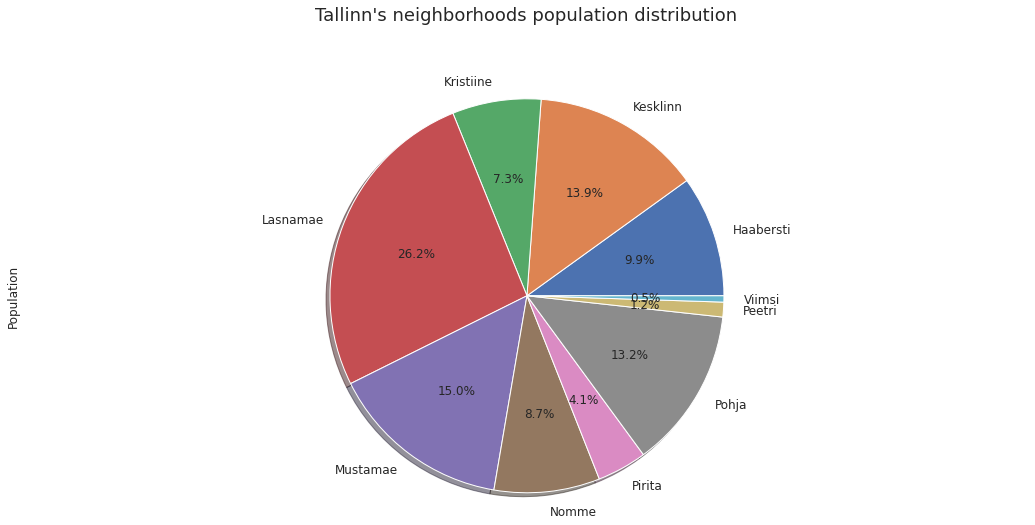

In [352]:
District = ['Haabersti','Kesklinn','Kristiine','Lasnamae','Mustamae','Nomme','Pirita','Pohja','Peetri','Viimsi']


tallinn_data['Population'].plot(kind='pie',
                                           figsize=(18,8),
                                           autopct='%1.1f%%',
                                           shadow=True,
                                           labels=District,
                                           fontsize=12
                                           )

plt.title("Tallinn's neighborhoods population distribution",fontsize=18, y=1.12) 
plt.axis('equal') 

<br> From the bar chart we can determine that the 68.3% of Tallinn population lives in 4 of its districts: Mustamae, Lasnamae, Kesklinn and Pohja.<br><br><br>

Text(0.5, 0, 'Neighborhood')

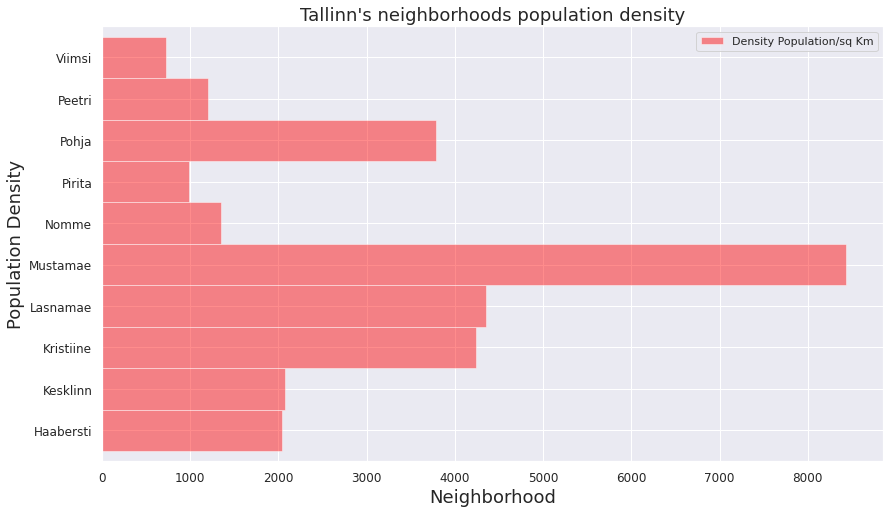

In [353]:
population_density_data = tallinn_data[['District','Density Population/sq Km']]

ax = population_density_data.plot(kind='barh',
                                  x='District',
                                  y='Density Population/sq Km',
                                  fontsize=12,
                                  width=1,
                                  alpha=0.45,
                                  figsize=(14,8),
                                  color='red')
ax.set_title("Tallinn's neighborhoods population density",fontsize=18)
ax.set_ylabel('Population Density',fontsize=18)
ax.set_xlabel('Neighborhood',fontsize=18)

The bar chart shows that in 4 of Tallinn's district the population density per km2 is relitevely higher compared to the other 6 neighborhoods.